### **TASK:2 :CREDIT CARD FRAUD DETECTION**
Author: Shivam Shukla

Batch: September

Domain: Data Science

Aim: To Build a machine learning model to identify fraudulent credit card
transactions

## **IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## **READING DATASET**

In [ ]:
data=pd.read_csv('creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265360 entries, 0 to 265359
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    265360 non-null  float64
 1   V1      265360 non-null  float64
 2   V2      265360 non-null  float64
 3   V3      265360 non-null  float64
 4   V4      265360 non-null  float64
 5   V5      265359 non-null  float64
 6   V6      265359 non-null  float64
 7   V7      265359 non-null  float64
 8   V8      265359 non-null  float64
 9   V9      265359 non-null  float64
 10  V10     265359 non-null  float64
 11  V11     265359 non-null  float64
 12  V12     265359 non-null  float64
 13  V13     265359 non-null  float64
 14  V14     265359 non-null  float64
 15  V15     265359 non-null  float64
 16  V16     265359 non-null  float64
 17  V17     265359 non-null  float64
 18  V18     265359 non-null  float64
 19  V19     265359 non-null  float64
 20  V20     265359 non-null  float64
 21  V21     26

Converting Class column into int64

In [ ]:
data['Class']=data['Class'].astype('int64')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checking for null values

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**There are no null values**

## **DESCRIPTIVE STATISTICS**

In [ ]:
#distribution of legit transaction and fraudlent transcations
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This dataset is highly unbalanced  

0---> Normal transaction

1---> Fraudlent transaction

In [ ]:
#separating data for analysis

legit = data[data.Class==0]
fraud = data[data.Class==1]

In [ ]:
legit.shape

(284315, 31)

In [ ]:
fraud.shape

(492, 31)

In [ ]:
#statsitical measure for data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#compare values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## **EDA**

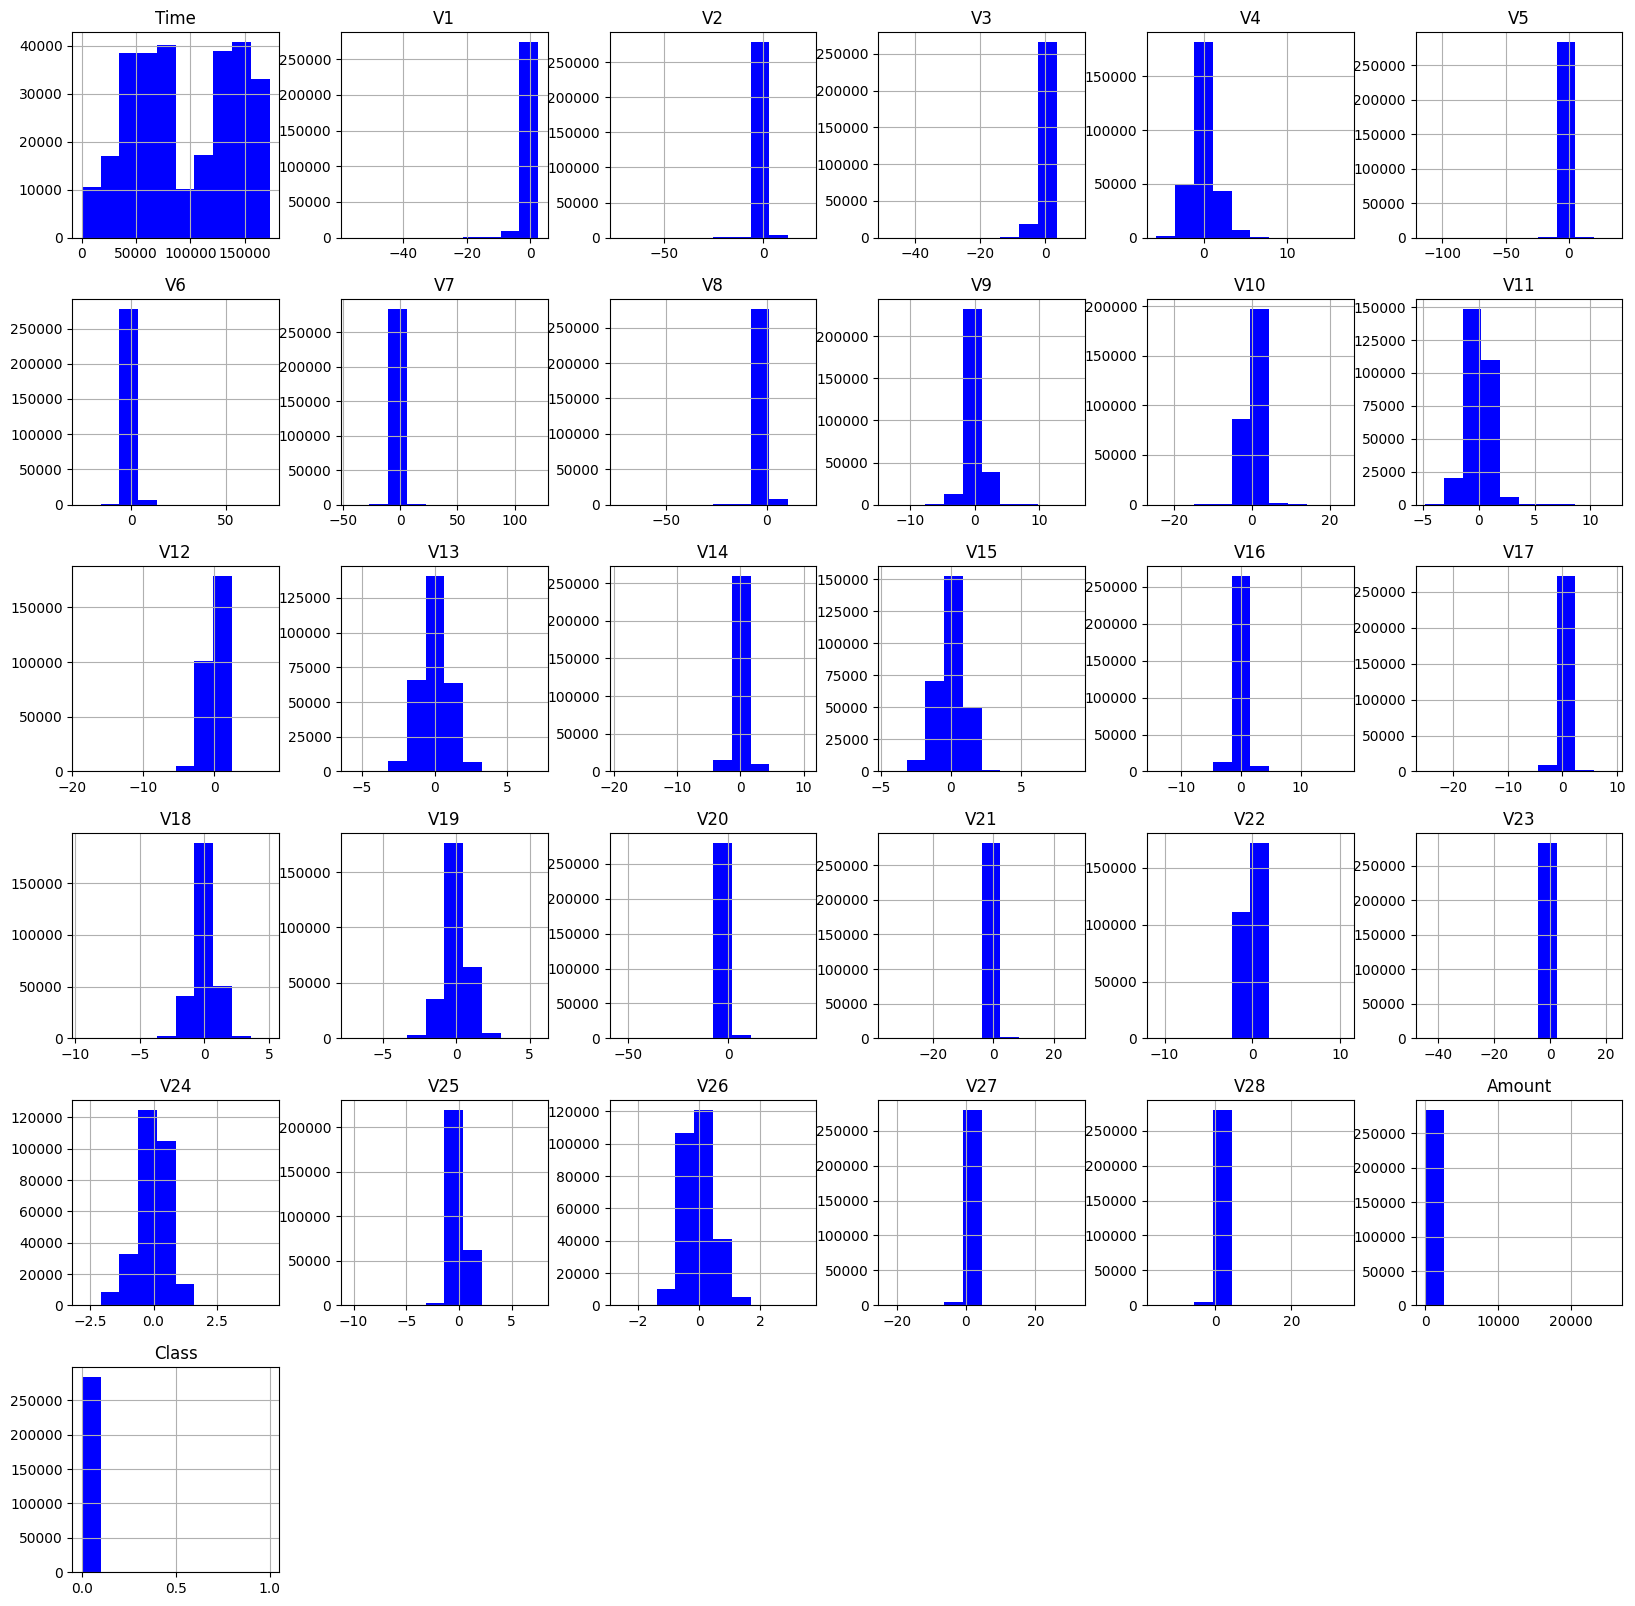

In [ ]:
data.hist(figsize=(20,20),color='blue')
plt.show()


**CORRELATION**

<Axes: >

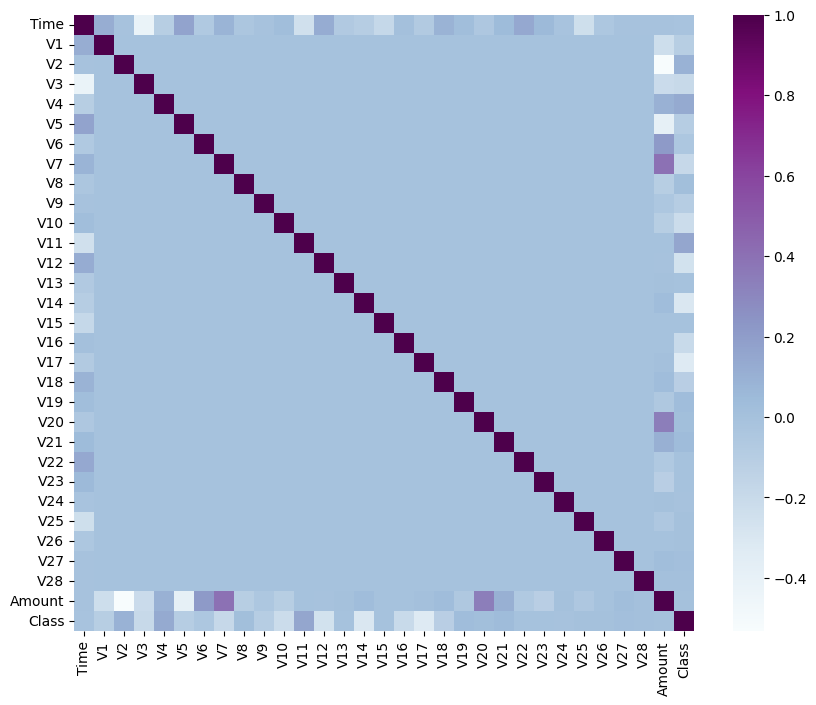

In [ ]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

#UNDERSAMPLING DATA

In [ ]:
legit_sample = legit.sample(n=492)

**Conncatinating both Dataframes**

In [ ]:
df= pd.concat([legit_sample, fraud],axis=0)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
142596,84816.0,0.031139,0.100315,1.259163,-1.196184,-1.026710,-0.944372,0.118948,-0.192915,-0.607924,...,-0.291272,-0.270257,0.008395,0.338087,-0.437534,-0.564767,0.235358,0.166526,28.60,0
109088,71211.0,-0.288759,0.373960,1.880359,-0.567960,0.205877,-0.489679,0.607843,-0.371659,0.632283,...,-0.037955,0.129583,-0.086253,-0.143977,-0.965873,-0.070671,-0.289618,-0.269419,9.20,0
217000,140723.0,-0.139426,0.084664,-0.524809,-1.121330,1.481552,4.463873,-1.488169,1.837941,1.210651,...,0.237588,0.797782,0.194986,0.658411,-1.161275,0.429498,0.080804,0.077851,20.00,0
72724,54830.0,-1.258003,0.173115,0.598567,0.939153,0.337687,-0.041067,0.220517,0.617413,-0.955736,...,0.369614,0.530978,0.101807,-0.318428,-0.286432,-0.307877,0.033599,-0.017692,107.71,0
66832,52239.0,-10.742858,7.060294,-11.428008,1.984421,-6.387197,-2.257884,-4.278418,7.262770,-0.245887,...,-0.051358,-1.013817,-0.028385,-0.393721,0.710325,-0.323076,-0.121281,-0.306747,89.99,0


In [ ]:
df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95254.898374,-0.074161,0.080110,0.090076,0.006704,0.024347,-0.047733,0.044758,-0.039456,-0.027526,...,0.009690,-0.033916,0.013243,0.026865,-0.036314,-0.006494,0.001410,0.015321,-0.002732,81.392033
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Splitting data into features and targets**



In [ ]:
x=df.drop(columns='Class', axis=1)
y=df['Class']

In [ ]:
print(y)

142596    0
109088    0
217000    0
72724     0
66832     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


## **SPLITTING DATA INTO TRAIN AND TEST DATA**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,stratify=y,random_state=2)

In [ ]:
x.shape

(984, 30)

In [ ]:
x_train.shape

(787, 30)

In [ ]:
x_test.shape

(197, 30)

## **MODEL TRAINING USING LOGISTI-REGRESSIION**

In [ ]:
model= LogisticRegression()

In [ ]:
#training the LogisticRegression
model.fit(x_train,y_train)

LogisticRegression()

## **EVALUATING MODEL BASED ON ACCURACY SCORE**

In [ ]:
#accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [ ]:
print('Accuracy on Training data:',training_data_accuracy)

Accuracy on Training data: 0.9415501905972046


In [ ]:
#accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy on Test data:',test_data_accuracy )

Accuracy on Test data: 0.934010152284264


We got Accuracy on Training data: 0.9415501905972046 and Accuracy on Test data: 0.934010152284264